# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Dalam kasus diperlukannya mencari informasi pada halaman 'https://www.exchange-rates.org/exchange-rate-history/usd-idr' terkait nilai tukar USD terhadap IDR selama periode Maret hingga Agustus 2024. Informasi ini diharapkan dapat mengungkap nilai terendah dan nilai tertinggi beserta titik periode pada masing-masing nilai tersebut.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [11]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [13]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>US Dollar to Indonesian Rupiah History - USD to IDR Historical Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html;'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [14]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

Pada section ini, setelah menemukan url dan finding the right key for the table section on the website. Perlu dijalankan print table dari section html yang telah dicari.

In [15]:
table = soup.find('section', attrs={'class':'box history-rates-table-box'})
print(table.prettify()[1:500])

section class="box history-rates-table-box">
 <h2 class="title">
  <span>
   USD to IDR History for Last 6 Months
  </span>
 </h2>
 <div class="inner">
  <table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
   <thead>
    <tr>
     <th class="ltr-bidi-fix">
      Date
     </th>
     <th class="ltr-bidi-fix">
      US Dollar to Indonesian Rupiah
     </th>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      <a class="w" href="/exchange-rate-history/usd-idr-2024-08


Next, we need to find the row length.

In [16]:
usdrates = table.find_all('tr')
row_length = len(usdrates)
row_length

134

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [17]:
temp = []  # Initiating a tuple

for i in range(1, row_length):

    # Scraping process
    # tanggal = usdrates.find_all('a', attrs={'class':'w'})[i].text
    # harga_harian = usdrates.find_all('span', attrs={'class':'w'})[i].text   
    #periode = usdrates[i].find_all('td')[0]
    #rates = usdrates[i].find_all('td')[1]

    try: 
        time = usdrates[i].find('a', attrs={'class':'n'}).text
        price = usdrates[i].find('span', attrs={'class':'w'}).text
        temp.append((time, price))
    except:
        pass
    
    # You can add your scraping code here
    #temp.append((time, harga_harian))
    
temp

[('2024-8-30', '1 USD = 15,532 IDR'),
 ('2024-8-29', '1 USD = 15,466 IDR'),
 ('2024-8-28', '1 USD = 15,446 IDR'),
 ('2024-8-27', '1 USD = 15,481 IDR'),
 ('2024-8-26', '1 USD = 15,483 IDR'),
 ('2024-8-23', '1 USD = 15,401 IDR'),
 ('2024-8-22', '1 USD = 15,751 IDR'),
 ('2024-8-21', '1 USD = 15,508 IDR'),
 ('2024-8-20', '1 USD = 15,449 IDR'),
 ('2024-8-19', '1 USD = 15,530 IDR'),
 ('2024-8-16', '1 USD = 15,698 IDR'),
 ('2024-8-15', '1 USD = 15,773 IDR'),
 ('2024-8-14', '1 USD = 15,634 IDR'),
 ('2024-8-13', '1 USD = 15,756 IDR'),
 ('2024-8-12', '1 USD = 15,948 IDR'),
 ('2024-8-9', '1 USD = 15,950 IDR'),
 ('2024-8-8', '1 USD = 15,985 IDR'),
 ('2024-8-7', '1 USD = 16,030 IDR'),
 ('2024-8-6', '1 USD = 16,175 IDR'),
 ('2024-8-5', '1 USD = 16,222 IDR'),
 ('2024-8-2', '1 USD = 16,176 IDR'),
 ('2024-8-1', '1 USD = 16,275 IDR'),
 ('2024-7-31', '1 USD = 16,251 IDR'),
 ('2024-7-30', '1 USD = 16,326 IDR'),
 ('2024-7-29', '1 USD = 16,297 IDR'),
 ('2024-7-26', '1 USD = 16,304 IDR'),
 ('2024-7-25', '1 U

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [18]:
import pandas as pd

df = pd.DataFrame(temp)
df.head()

,0,1
0,2024-8-30,"1 USD = 15,532 IDR"
1,2024-8-29,"1 USD = 15,466 IDR"
2,2024-8-28,"1 USD = 15,446 IDR"
3,2024-8-27,"1 USD = 15,481 IDR"
4,2024-8-26,"1 USD = 15,483 IDR"


In [22]:
df.rename(columns= {0: 'date',
                    1 : 'exchange_rates'},
                    inplace= True)
df.head()

,date,exchange_rates
0,2024-8-30,"1 USD = 15,532 IDR"
1,2024-8-29,"1 USD = 15,466 IDR"
2,2024-8-28,"1 USD = 15,446 IDR"
3,2024-8-27,"1 USD = 15,481 IDR"
4,2024-8-26,"1 USD = 15,483 IDR"


### Data Cleansing

Dikarenakan nama table masih 0 dan 1, jd perlukan rename table. Kemudian tipe data dari masing-masing kolom masih salah sehingga perlu pengubahan tipe, date -> datetime, exchange rates -> float64.

In [32]:
df['exchange_rates'] = df['exchange_rates'].str.replace("1 USD = ","")
df['exchange_rates'] = df['exchange_rates'].str.replace(" IDR","")
df['exchange_rates'] = df['exchange_rates'].str.replace(",","")
df['exchange_rates'] = df['exchange_rates'].astype('float64')
df['date'] = df['date'].astype('datetime64[ns]')
df

,date,exchange_rates
0,2024-08-30,15532.0
1,2024-08-29,15466.0
2,2024-08-28,15446.0
3,2024-08-27,15481.0
4,2024-08-26,15483.0
...,...,...
125,2024-03-08,15541.0
126,2024-03-07,15627.0
127,2024-03-06,15660.0
128,2024-03-05,15743.0


In [33]:
df.dtypes

date              datetime64[ns]
exchange_rates           float64
dtype: object

### Data Visualization

Setelah melakukan data cleansing, data tsb bisa di buat dalam grafik, yang dimana date menjadi index x dalam grafik dibawah.

In [34]:
df = df.set_index('date')

<AxesSubplot: xlabel='date'>

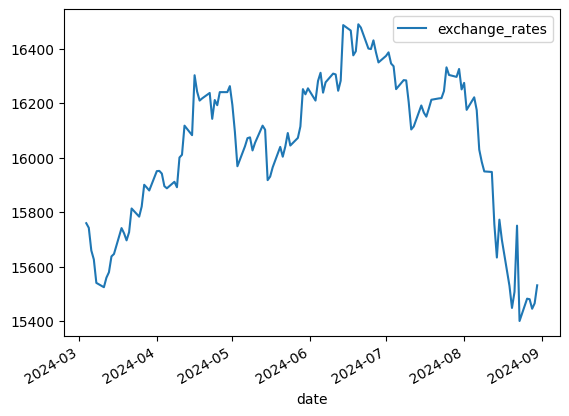

In [35]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis

Berdasarkan informasi yang di dapatkan dari website 'https://www.exchange-rates.org/exchange-rate-history/usd-idr', dapat diketahui bahwa nilai tukar 1 USD terhadap IDR selama 6 bulan terakhir (Agustus - Maret 2024) bergerak sangat fluktuatif. Nilai tertinggi mencapai Rp16.400 pada bulan Juni 2024 dan nilai terendah Rp15.400 pada bulan Agustus 2024.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.